<h1 style="text-align:center;background-color:#DE9393;color:white;padding:20px;border-radius:10px">Collecte de données web avec la bibliothèque BeautifulSoup : Cas du site Expat Dakar</h1>

In [72]:
import requests
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

In [2]:
expatDakar = requests.get("https://www.expat-dakar.com/telephones")

In [3]:
expatDakar.status_code

200

In [4]:
expatDakarSoup = BeautifulSoup(expatDakar.text)

In [5]:
portables = expatDakarSoup.find_all("div", class_="listing-card__content")

In [6]:
print("Nombre de portables trouvés : {}".format(len(portables)))

Nombre de portables trouvés : 12


In [7]:
# Description du téléphone portable
portables[2].find("div", class_="listing-card__header__title").text.strip()

'Xr 64 giga'

In [8]:
# Etat du téléphone portable : neuf, occasion ou venant
portables[2].find("span", class_="listing-card__header__tags__item listing-card__header__tags__item--condition listing-card__header__tags__item--condition_used").text.strip()

"D'occasion"

In [9]:
# Marque du téléphone portable : Iphone, Samsung, Tecno, Huawei, etc.
portables[2].find("span", class_="listing-card__header__tags__item listing-card__header__tags__item--make listing-card__header__tags__item--make_iphone").text.strip()

'iPhone'

In [10]:
# Lieu de vente
portables[2].find("div", class_="listing-card__header__location").text.strip()

'Hann maristes,\nDakar'

In [11]:
# Prix du téléphone portable
portables[2].find("div", class_="listing-card__info-bar__price").text.replace("\u202f", "").strip()

'185000 F Cfa'

In [12]:
infos = []

for portable in portables:
    try:
        description = portable.find("div", class_="listing-card__header__title").text.strip()
    except:
        description = None
    try:
        etat_telephone = portable.find("span", class_="listing-card__header__tags__item listing-card__header__tags__item--condition listing-card__header__tags__item--condition_used").text.strip()
    except:
        etat_telephone = None
    try:
        marque = portable.find("span", class_="listing-card__header__tags__item listing-card__header__tags__item--make listing-card__header__tags__item--make_iphone").text.strip()
    except:
        marque = None
    try:
        lieu_de_vente = portable.find("div", class_="listing-card__header__location").text.strip()
    except:
        lieu_de_vente = None
    try:
        prix = portable.find("div", class_="listing-card__info-bar__price").text.replace("\u202f", "").strip()
    except:
        prix = None
    
    info = {
        "Description":description,
        "Etat du téléphone": etat_telephone,
        "Marque":marque,
        "Lieu de vente":lieu_de_vente,
        "Prix":prix
    }
    
    infos.append(info)

In [13]:
import pandas as pd

In [14]:
resultats = pd.DataFrame(infos)

In [15]:
resultats

,Description,Etat du téléphone,Marque,Lieu de vente,Prix
0,HUAWEI P10 Lite,None,None,"Colobane,\nDakar",55000 F Cfa
1,Crosscall Core-M5,None,None,"Gueule-Tapée,\nDakar",280000 F Cfa
2,Xr 64 giga,D'occasion,iPhone,"Hann maristes,\nDakar",185000 F Cfa
3,iPhone X 256,None,iPhone,"Hann maristes,\nDakar",190000 F Cfa
4,iPhone 12 Pro 256 giga,D'occasion,iPhone,"Hann maristes,\nDakar",480000 F Cfa
5,iPhone XS Max 256,D'occasion,iPhone,"Sicap baobab,\nDakar",270000 F Cfa
6,Tecno Spark 7 Pro,None,None,"Dalifort,\nDakar",87000 F Cfa
7,SAMSUNG J3 VENANT DE FRANCE,None,None,"Yoff,\nDakar",35000 F Cfa
8,Samsung serie A,None,None,"Plateau,\nDakar",1 F Cfa
9,Camon 17 pro 256/6gb,None,None,"Plateau,\nDakar",150000 F Cfa


In [18]:
resultats["Etat du téléphone"].value_counts()

D'occasion    3
Name: Etat du téléphone, dtype: int64

In [19]:
resultats["Marque"].value_counts()

iPhone    6
Name: Marque, dtype: int64

## Extraction des informations relatives aux classes présentant une certaine spécificité par rapport à la marque

### Première méthode d'extraction de la marque

In [38]:
portables[1].find("div", class_="listing-card__header__tags").find_all("span")
etatTelephone = portables[1].find("div", class_="listing-card__header__tags").find_all("span")[0].text
marque = portables[1].find("div", class_="listing-card__header__tags").find_all("span")[1].text

### Deuxième méthode d'extraction de la marque

In [42]:
marqueTelephone = portables[2].find("div", class_="listing-card__header__tags").find_all("span")[1]
marqueTelephone.attrs["class"][-1].split("_")[-1]

'iphone'

In [33]:
for portable in portables:
    marque = portable.find("div", class_="listing-card__header__tags").find_all("span")[1].attrs["class"][2].split("_")[-1]
    print(marque)

huawei
crosscall
iphone
iphone
iphone
iphone
tecno
samsung
samsung
tecno
iphone
iphone


## Extraction des informations relatives à l'état des téléphones portables

In [34]:
for portable in portables:
    etatTelephone = portable.find("div", class_="listing-card__header__tags").find_all("span")[0].text
    print(etatTelephone)

Venant
Neuf
D'occasion
Neuf
D'occasion
D'occasion
Neuf
Venant
Neuf
Neuf
Neuf
Venant


In [47]:
infosAmeliorees = []

for portable in portables:
    try:
        description = portable.find("div", class_="listing-card__header__title").text.strip()
    except:
        description = None
    try:
        # Amélioration à partir de la première méthode
        etat_telephone = portable.find("div", class_="listing-card__header__tags").find_all("span")[0].text
    except:
        etat_telephone = None
    try:
        # Amélioration à partir de la première éthode
        marque = portable.find("div", class_="listing-card__header__tags").find_all("span")[1].text
    except:
        marque = None
    try:
        lieu_de_vente = portable.find("div", class_="listing-card__header__location").text.strip()
    except:
        lieu_de_vente = None
    try:
        prix = portable.find("div", class_="listing-card__info-bar__price").text.replace("\u202f", "").strip()
    except:
        prix = None
    
    info = {
        "Description":description,
        "Etat du téléphone": etat_telephone,
        "Marque":marque,
        "Lieu de vente":lieu_de_vente,
        "Prix":prix
    }
    
    infosAmeliorees.append(info)

In [48]:
pd.DataFrame(infosAmeliorees)

,Description,Etat du téléphone,Marque,Lieu de vente,Prix
0,HUAWEI P10 Lite,Venant,Huawei,"Colobane,\nDakar",55000 F Cfa
1,Crosscall Core-M5,Neuf,Crosscall,"Gueule-Tapée,\nDakar",280000 F Cfa
2,Xr 64 giga,D'occasion,iPhone,"Hann maristes,\nDakar",185000 F Cfa
3,iPhone X 256,Neuf,iPhone,"Hann maristes,\nDakar",190000 F Cfa
4,iPhone 12 Pro 256 giga,D'occasion,iPhone,"Hann maristes,\nDakar",480000 F Cfa
5,iPhone XS Max 256,D'occasion,iPhone,"Sicap baobab,\nDakar",270000 F Cfa
6,Tecno Spark 7 Pro,Neuf,Tecno,"Dalifort,\nDakar",87000 F Cfa
7,SAMSUNG J3 VENANT DE FRANCE,Venant,Samsung,"Yoff,\nDakar",35000 F Cfa
8,Samsung serie A,Neuf,Samsung,"Plateau,\nDakar",1 F Cfa
9,Camon 17 pro 256/6gb,Neuf,Tecno,"Plateau,\nDakar",150000 F Cfa


## Généralisation de la méthode de collecte d'informations à l'ensemble des pages du site de Expact Dakar

In [61]:
pages = []

for i in range(100):
    if (i+1) == 1:
        page = requests.get("https://www.expat-dakar.com/telephones")
    else:
        page = requests.get("https://www.expat-dakar.com/telephones?page={}".format((i+1)))
    pages.append(BeautifulSoup(page.text))

In [59]:
#print("Il y a {} pages sur {} de code status 200".format(sum([int(page.status_code == 200) for page in pages]), len(pages)))

In [62]:
infosGlobales = []

for page in pages:
    portables = page.find_all("div", class_="listing-card__content")
    for portable in portables:
        try:
            description = portable.find("div", class_="listing-card__header__title").text.strip()
        except:
            description = None
        try:
            # Amélioration à partir de la première méthode
            etat_telephone = portable.find("div", class_="listing-card__header__tags").find_all("span")[0].text
        except:
            etat_telephone = None
        try:
            # Amélioration à partir de la première éthode
            marque = portable.find("div", class_="listing-card__header__tags").find_all("span")[1].text
        except:
            marque = None
        try:
            lieu_de_vente = portable.find("div", class_="listing-card__header__location").text.strip()
        except:
            lieu_de_vente = None
        try:
            prix = portable.find("div", class_="listing-card__info-bar__price").text.replace("\u202f", "").strip()
        except:
            prix = None

        info = {
            "Description":description,
            "Etat du téléphone": etat_telephone,
            "Marque":marque,
            "Lieu de vente":lieu_de_vente,
            "Prix":prix
        }

        infosGlobales.append(info)

In [68]:
resultatGlobal = pd.DataFrame(infosGlobales)

In [69]:
resultatGlobal

,Description,Etat du téléphone,Marque,Lieu de vente,Prix
0,HUAWEI P10 Lite,Venant,Huawei,"Colobane,\nDakar",55000 F Cfa
1,Téléphone CROSSCALL Core S4,Neuf,Crosscall,"Gueule-Tapée,\nDakar",80000 F Cfa
2,Google pixel 2xl venant 128go ram 4go 4g lte A...,Neuf,Google,"Plateau,\nDakar",89900 F Cfa
3,Xr 64 giga,D'occasion,iPhone,"Hann maristes,\nDakar",185000 F Cfa
4,iPhone X 256,Neuf,iPhone,"Hann maristes,\nDakar",190000 F Cfa
...,...,...,...,...,...
1195,Samsung galaxy A72,D'occasion,Samsung,"Plateau,\nDakar",160000 F Cfa
1196,Téléphone,D'occasion,iPhone,"Hlm grand-yoff,\nDakar",350000 F Cfa
1197,IPhone 13 128 go,Neuf,iPhone,"Sicap Liberté,\nDakar",520000 F Cfa
1198,IPhone 7+ 128gb,D'occasion,iPhone,"Parcelles Assainies,\nDakar",110000 F Cfa


In [70]:
resultatGlobal["Marque"].value_counts()

iPhone       475
Samsung      233
Huawei       150
Xiaomi        76
Crosscall     66
Tecno         51
Google        27
Autres        21
Sony          19
Oppo          15
Infinix       10
LG            10
OnePlus        8
Invens         8
iPad           5
Microsoft      2
Lenovo         2
Nokia          2
TCL            1
Ice-Phone      1
HP             1
Amazon         1
Motorola       1
x-tigi         1
Acer           1
HTC            1
Name: Marque, dtype: int64

<AxesSubplot:>

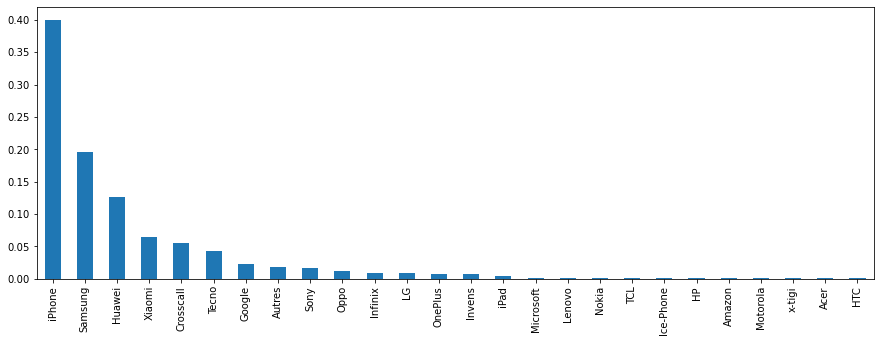

In [74]:
plt.figure(figsize=(15, 5))
resultatGlobal["Marque"].value_counts(normalize=True).plot(kind="bar")

<AxesSubplot:>

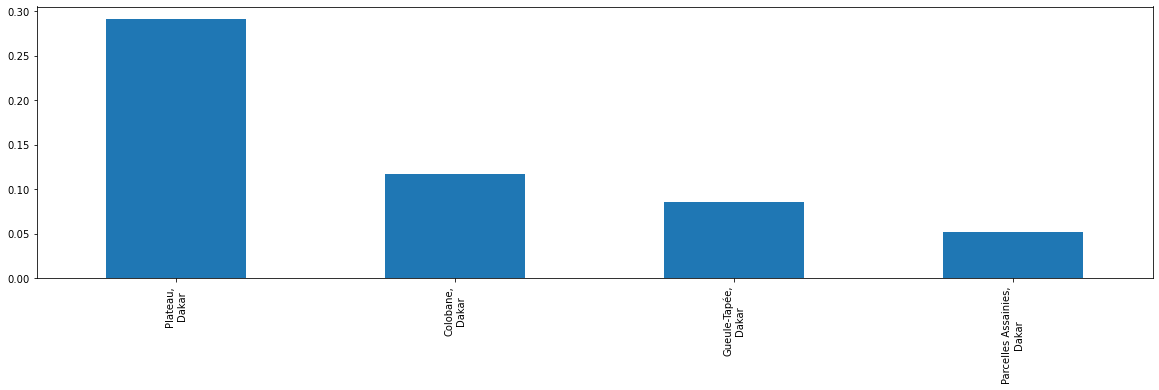

In [84]:
plt.figure(figsize=(20, 5))
lieuDeVentes = resultatGlobal["Lieu de vente"].value_counts(normalize=True)
lieuDeVentes[lieuDeVentes >= 0.05].plot(kind="bar")

In [77]:
resultatGlobal["Lieu de vente"].unique()

array(['Colobane,\nDakar', 'Gueule-Tapée,\nDakar', 'Plateau,\nDakar',
       'Hann maristes,\nDakar', 'Sicap baobab,\nDakar',
       'Dalifort,\nDakar', 'Yoff,\nDakar', 'Médina,\nDakar',
       'Fann,\nDakar', 'Castor,\nDakar', 'Dieuppeul,\nDakar',
       'Almadies 2,\nDakar', 'Hlm,\nDakar', 'Point-e,\nDakar',
       'Grand-Yoff,\nDakar', 'Sicap Liberté,\nDakar',
       'Keur Massar,\nDakar', 'Parcelles Assainies,\nDakar',
       'Parcelles Assainies,\n Dakar', 'Liberte 6 extension,\nDakar',
       'Fenêtre mermoz,\nDakar', 'Rufisque,\nDakar',
       'Hann Bel-Air,\nDakar', 'Biscuiterie,\nDakar', 'Kaolack,\nKaolack',
       'Mermoz,\nDakar', 'Almadies,\nDakar', 'Sicap foire,\nDakar',
       'Derkle,\nDakar', 'Bel air,\nDakar', 'Hlm grand-yoff,\nDakar',
       'Sacré-cœur,\nDakar', 'Gibraltar,\nDakar', 'Plateau,\n Dakar',
       'Liberte 2,\nDakar', 'Dalifort,\n Dakar', 'Nord foire,\nDakar',
       'Ouest foire,\nDakar', 'Cité biagui,\nDakar', 'Guediawaye,\nDakar',
       'Kaffrine,\nKa